In [1]:
import pandas as pd
import sqlite3, matplotlib
from sqlalchemy import create_engine
import re

### Read data from CSV 

In [2]:
# read the marriage rates
df_mr = pd.read_csv('state_marriage_rates.csv', encoding='utf-8')
# read the divorce rates
df_dr = pd.read_csv('state_divorce_rates.csv', encoding='utf-8')

In [3]:
df_mr.head(5)

,State,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,2000,1999,1995,1990,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Alabama,7.1,7.4,7.8,7.8,8.2,8.4,8.2,8.3,8.6,...,10.1,10.8,9.8,10.6,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,7.1,7.4,7.5,7.3,7.2,7.8,8.0,7.8,8.4,...,8.9,8.6,9.0,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,5.9,5.9,5.8,5.4,5.6,5.7,5.9,5.6,6.0,...,7.5,8.2,8.8,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,9.9,10.0,10.1,9.8,10.9,10.4,10.8,10.7,10.6,...,15.4,14.8,14.4,15.3,NaN,NaN,NaN,NaN,NaN,NaN
4,California,6.5,6.2,6.4,6.5,6.0,5.8,5.8,5.8,6.7,...,5.8,6.4,6.3,7.9,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_dr.head(5)

,State,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,Alabama,3.8,3.9,3.8,3.7,3.6,4.3,4.4,4.4,4.3,...,4.9,4.9,4.9,5.2,5.4,5.4,5.5,5.7,6.0,6.1
1,Alaska,3.9,4.1,4.0,4.5,4.5,4.8,4.7,4.4,4.4,...,4.2,4.3,4.3,3.9,4.6,4.3,3.9,5.0,5.0,5.5
2,Arizona,3.4,3.6,3.9,3.9,4.3,3.9,3.5,3.6,3.8,...,4.0,4.2,4.3,4.4,4.8,4.0,4.6,4.6,6.2,6.9
3,Arkansas,3.9,4.8,4.8,5.0,5.3,5.3,5.7,5.7,5.5,...,5.8,6.0,6.1,6.0,6.2,6.2,6.4,6.2,6.3,6.9
4,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3


In [5]:
df_mr.columns

Index(['State', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009',
       '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000',
       '1999', '1995', '1990', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [6]:
df_mr= df_mr.iloc[:,0:21]
df_mr.head()

,State,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,Alabama,7.1,7.4,7.8,7.8,8.2,8.4,8.2,8.3,8.6,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
1,Alaska,7.1,7.4,7.5,7.3,7.2,7.8,8.0,7.8,8.4,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
2,Arizona,5.9,5.9,5.8,5.4,5.6,5.7,5.9,5.6,6.0,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
3,Arkansas,9.9,10.0,10.1,9.8,10.9,10.4,10.8,10.7,10.6,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
4,California,6.5,6.2,6.4,6.5,6.0,5.8,5.8,5.8,6.7,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9


In [7]:
# convert the float to strings for marriage rates
df_mr.columns = ['State']+['Y_'+str(col) for col in df_mr.columns if col != 'State']
df_mr.columns

Index(['State', 'Y_2016', 'Y_2015', 'Y_2014', 'Y_2013', 'Y_2012', 'Y_2011',
       'Y_2010', 'Y_2009', 'Y_2008', 'Y_2007', 'Y_2006', 'Y_2005', 'Y_2004',
       'Y_2003', 'Y_2002', 'Y_2001', 'Y_2000', 'Y_1999', 'Y_1995', 'Y_1990'],
      dtype='object')

In [8]:
# convert the float to strings for divorce rates
df_dr.columns = ['State']+['Y_'+str(col) for col in df_dr.columns if col != 'State']
df_dr.columns

Index(['State', 'Y_2016', 'Y_2015', 'Y_2014', 'Y_2013', 'Y_2012', 'Y_2011',
       'Y_2010', 'Y_2009', 'Y_2008', 'Y_2007', 'Y_2006', 'Y_2005', 'Y_2004',
       'Y_2003', 'Y_2002', 'Y_2001', 'Y_2000', 'Y_1999', 'Y_1995', 'Y_1990'],
      dtype='object')

### Performing linear interpolation at missing datapoints

In [9]:
missing_data_rows = df_mr[df_mr.isnull().any(1)]
missing_data_rows

,State,Y_2016,Y_2015,Y_2014,Y_2013,Y_2012,Y_2011,Y_2010,Y_2009,Y_2008,...,Y_2006,Y_2005,Y_2004,Y_2003,Y_2002,Y_2001,Y_2000,Y_1999,Y_1995,Y_1990
10,Georgia,6.8,6.2,NaN,NaN,6.5,6.6,7.3,6.6,6.0,...,7.3,7.0,7.9,7.0,6.5,6.1,6.8,7.8,8.4,10.3
18,Louisiana,6.1,6.8,6.9,6.4,5.7,6.4,6.9,7.1,6.8,...,NaN,8.0,8.0,8.2,8.1,8.4,9.1,9.1,9.3,9.6
36,Oklahoma,6.7,7.4,7.1,7.1,6.9,6.9,7.2,6.9,7.1,...,7.3,7.3,6.5,NaN,NaN,NaN,NaN,6.8,8.6,10.6


In [10]:
ga = missing_data_rows.iloc[0][1:]
la = missing_data_rows.iloc[1][1:]
ok = missing_data_rows.iloc[2][1:]
ga_index, la_index, ok_index = 10, 18, 36

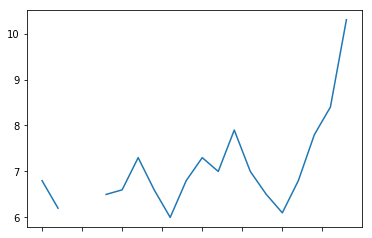

In [30]:
# plot the mr for Georgia
ga.plot()

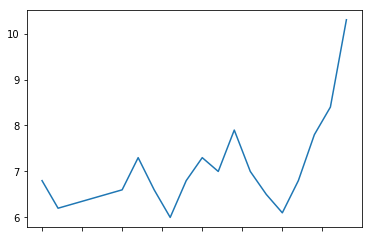

In [12]:
ga_clean_df = ga.astype(float).interpolate()
ga_clean_df.plot()

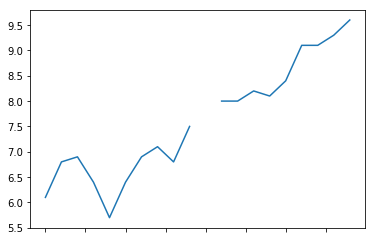

In [13]:
# plot the mr for Louisiana
la.plot()

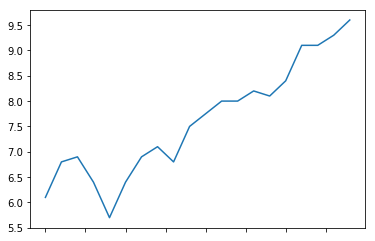

In [14]:
la_clean_df = la.astype(float).interpolate()
la_clean_df.plot()

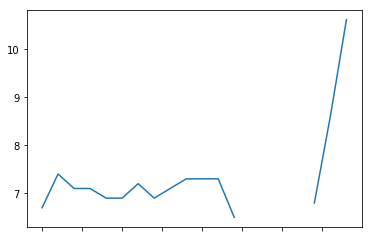

In [15]:
# plot the mr for Oklahoma
ok.plot()

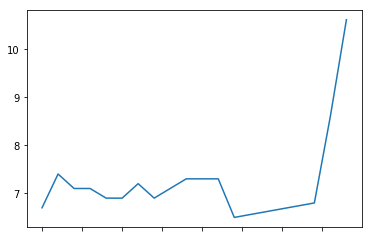

In [16]:
ok_clean_df = ok.astype(float).interpolate()
ok_clean_df.plot()

In [17]:
# assign the clean data to the states that have missing data
df_mr.loc[ga_index, 1:]= ga_clean_df.values
df_mr.loc[la_index, 1:]= la_clean_df.values
df_mr.loc[ok_index, 1:]= ok_clean_df.values

In [18]:
# check if the missing datapoints still exist 
check_missing_data_rows = df_mr[df_mr.isnull().any(1)]
check_missing_data_rows

,State,Y_2016,Y_2015,Y_2014,Y_2013,Y_2012,Y_2011,Y_2010,Y_2009,Y_2008,...,Y_2006,Y_2005,Y_2004,Y_2003,Y_2002,Y_2001,Y_2000,Y_1999,Y_1995,Y_1990


In [19]:
df_mr.head()

,State,Y_2016,Y_2015,Y_2014,Y_2013,Y_2012,Y_2011,Y_2010,Y_2009,Y_2008,...,Y_2006,Y_2005,Y_2004,Y_2003,Y_2002,Y_2001,Y_2000,Y_1999,Y_1995,Y_1990
0,Alabama,7.1,7.4,7.8,7.8,8.2,8.4,8.2,8.3,8.6,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
1,Alaska,7.1,7.4,7.5,7.3,7.2,7.8,8.0,7.8,8.4,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
2,Arizona,5.9,5.9,5.8,5.4,5.6,5.7,5.9,5.6,6.0,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
3,Arkansas,9.9,10.0,10.1,9.8,10.9,10.4,10.8,10.7,10.6,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
4,California,6.5,6.2,6.4,6.5,6.0,5.8,5.8,5.8,6.7,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9


In [20]:
df_mr.columns

Index(['State', 'Y_2016', 'Y_2015', 'Y_2014', 'Y_2013', 'Y_2012', 'Y_2011',
       'Y_2010', 'Y_2009', 'Y_2008', 'Y_2007', 'Y_2006', 'Y_2005', 'Y_2004',
       'Y_2003', 'Y_2002', 'Y_2001', 'Y_2000', 'Y_1999', 'Y_1995', 'Y_1990'],
      dtype='object')

### Save to the sqlite database

In [21]:
engine = create_engine('sqlite:///../db/marriage_and_divorce_rates.sqlite', echo=False)

In [22]:
# save the marriage data into sqlite
df_mr.to_sql('marriage_rates', con=engine, if_exists='replace')

In [23]:
# save the divorce data into sqlite
df_dr.to_sql('divorce_rates', con=engine, if_exists='replace')

In [24]:
engine.execute("SELECT * FROM marriage_rates").fetchall()

[(0, 'Alabama', 7.1, 7.4, 7.8, 7.8, 8.2, 8.4, 8.2, 8.3, 8.6, 8.9, 9.2, 9.2, 9.4, 9.6, 9.9, 9.4, 10.1, 10.8, 9.8, 10.6),
 (1, 'Alaska', 7.1, 7.4, 7.5, 7.3, 7.2, 7.8, 8.0, 7.8, 8.4, 8.5, 8.2, 8.2, 8.5, 8.1, 8.3, 8.1, 8.9, 8.6, 9.0, 10.2),
 (2, 'Arizona', 5.9, 5.9, 5.8, 5.4, 5.6, 5.7, 5.9, 5.6, 6.0, 6.4, 6.5, 6.6, 6.7, 6.5, 6.7, 7.6, 7.5, 8.2, 8.8, 10.0),
 (3, 'Arkansas', 9.9, 10.0, 10.1, 9.8, 10.9, 10.4, 10.8, 10.7, 10.6, 12.0, 12.4, 12.9, 13.4, 13.4, 14.3, 14.3, 15.4, 14.8, 14.4, 15.3),
 (4, 'California', 6.5, 6.2, 6.4, 6.5, 6.0, 5.8, 5.8, 5.8, 6.7, 6.2, 6.3, 6.4, 6.4, 6.1, 6.2, 6.5, 5.8, 6.4, 6.3, 7.9),
 (5, 'Colorado', 7.4, 6.8, 7.1, 6.5, 6.8, 7.0, 6.9, 6.9, 7.4, 7.1, 7.2, 7.6, 7.4, 7.8, 8.0, 8.2, 8.3, 8.2, 9.0, 9.8),
 (6, 'Connecticut', 5.6, 5.3, 5.4, 5.0, 5.2, 5.5, 5.6, 5.9, 5.4, 5.5, 5.5, 5.8, 5.8, 5.5, 5.7, 5.4, 5.7, 5.8, 6.6, 7.9),
 (7, 'Delaware', 5.6, 5.7, 6.0, 6.6, 5.8, 5.2, 5.2, 5.4, 5.5, 5.7, 5.9, 5.9, 6.1, 6.0, 6.4, 6.5, 6.5, 6.7, 7.3, 8.4),
 (8, 'District of Columbia', 8.1

In [25]:
engine.execute("SELECT * FROM divorce_rates").fetchall()

[(0, 'Alabama', 3.8, 3.9, 3.8, 3.7, 3.6, 4.3, 4.4, 4.4, 4.3, 4.5, 4.9, 4.9, 4.9, 5.2, 5.4, 5.4, 5.5, 5.7, 6.0, 6.1),
 (1, 'Alaska', 3.9, 4.1, 4.0, 4.5, 4.5, 4.8, 4.7, 4.4, 4.4, 4.3, 4.2, 4.3, 4.3, 3.9, 4.6, 4.3, 3.9, 5.0, 5.0, 5.5),
 (2, 'Arizona', 3.4, 3.6, 3.9, 3.9, 4.3, 3.9, 3.5, 3.6, 3.8, 4.0, 4.0, 4.2, 4.3, 4.4, 4.8, 4.0, 4.6, 4.6, 6.2, 6.9),
 (3, 'Arkansas', 3.9, 4.8, 4.8, 5.0, 5.3, 5.3, 5.7, 5.7, 5.5, 5.9, 5.8, 6.0, 6.1, 6.0, 6.2, 6.2, 6.4, 6.2, 6.3, 6.9),
 (4, 'California', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.3),
 (5, 'Colorado', 3.6, 3.7, 3.9, 4.1, 4.3, 4.4, 4.3, 4.3, 4.3, 4.4, 4.5, 4.4, 4.4, 4.3, 4.7, 4.7, 4.7, 4.8, 0.0, 5.5),
 (6, 'Connecticut', 3.2, 3.1, 2.6, 2.8, 2.7, 3.1, 2.9, 3.0, 3.4, 3.2, 3.1, 3.0, 3.1, 3.2, 3.3, 3.2, 3.3, 3.0, 2.9, 3.2),
 (7, 'Delaware', 3.1, 3.1, 3.3, 3.4, 3.5, 3.6, 3.5, 3.6, 3.5, 3.7, 3.8, 3.8, 3.7, 3.9, 3.5, 3.9, 3.9, 4.5, 5.0, 4.4),
 (8, 'District of Columbia', 2.7, 2.8, 2.6, 2.8, 2.9, 2

In [26]:
# Convert the index to primiary key
def get_create_table_string(tablename, connection):
    sql = """
    select * from sqlite_master where name = "{}" and type = "table"
    """.format(tablename) 
    result = connection.execute(sql)

    create_table_string = result.fetchmany()[0][4]
    return create_table_string

def add_pk_to_create_table_string(create_table_string, colname):
    regex = "(\n.+{}[^,]+)(,)".format(colname)
    return re.sub(regex, "\\1 PRIMARY KEY,",  create_table_string, count=1)

def add_pk_to_sqlite_table(tablename, index_column, connection):
    cts = get_create_table_string(tablename, connection)
    cts = add_pk_to_create_table_string(cts, index_column)
    template = """
    BEGIN TRANSACTION;
        ALTER TABLE {tablename} RENAME TO {tablename}_old_;

        {cts};

        INSERT INTO {tablename} SELECT * FROM {tablename}_old_;

        DROP TABLE {tablename}_old_;

    COMMIT TRANSACTION;
    """

    create_and_drop_sql = template.format(tablename = tablename, cts = cts)
    connection.executescript(create_and_drop_sql)

In [27]:
con = sqlite3.connect("../db/marriage_and_divorce_rates.sqlite")
# add_pk_to_sqlite_table('marriage_rates', 'index',)

In [28]:
add_pk_to_sqlite_table('marriage_rates', 'index', con)

In [29]:
add_pk_to_sqlite_table('divorce_rates', 'index', con)